In [20]:
height = 4
width = 12
Q = [[0 for x in range(width)] for y in range(height)]

In [21]:
start = [height-1,0]
goal = [height-1,width-1]
cliff = [[height-1,i] for i in range(1,width-1)]
actions = ["↑","←","↓","→"] # up left down right

# Qlearning

Episode 0: Steps taken = 575, Total rewards = -1960
Policy:
↓ ← ↓ ↑ → ↓ ← → ↓ ↑ ← ←
↓ ← ← → → ← ↓ ↑ ↓ ↑ ↓ →
→ ← ↑ ↑ ← ← → ↑ ← ← ↑ ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑

Episode 100: Steps taken = 17, Total rewards = -16
Policy:
↑ ← ← → → ↑ ← → → ↑ → ↓
→ → ↓ → → → ↓ ↓ → ↓ ↓ ↓
→ → → → → → → → → → → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑

Episode 200: Steps taken = 15, Total rewards = -14
Policy:
↑ → → → → → → → → ↓ → ↓
↑ → ↓ ↓ → → ↓ → → → → ↓
→ → → → → → → → → → → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑

Episode 300: Steps taken = 13, Total rewards = -12
Policy:
← ↑ ← ↓ → ↓ → ↑ → → → ↓
→ ← → ↓ → ↓ ↓ → → → → ↓
→ → → → → → → → → → → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑

Episode 400: Steps taken = 14, Total rewards = -13
Policy:
↑ ↓ ↑ → → ↓ → ↑ → → → ↓
↑ → ↓ ↓ ↓ ↓ ↓ → ↓ → ↓ ↓
→ → → → → → → → → → → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑

Episode 500: Steps taken = 25, Total rewards = -123
Policy:
↓ → → ↑ ↓ → → → → → ↓ ↓
↑ → ↓ → → ↓ → ↓ → ↓ → ↓
→ → → → → → → → → → → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑

Episode 600: Steps taken = 13, Total rewards = -12
Policy:
→ →

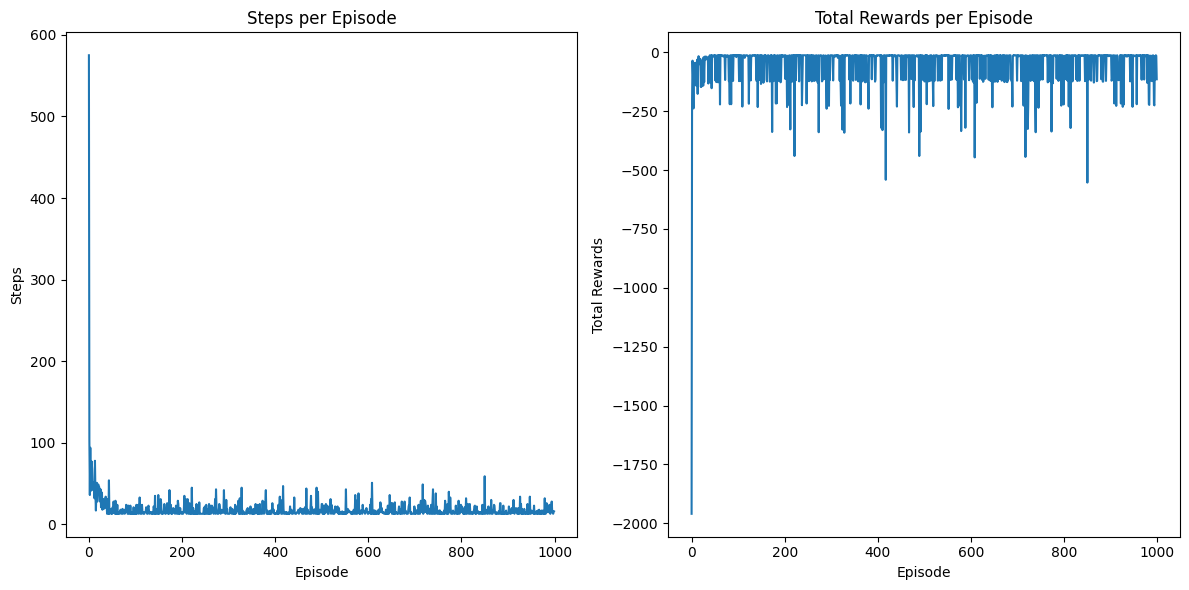

In [22]:
import numpy as np
import matplotlib.pyplot as plt

height = 4
width = 12
Q = np.zeros((height, width, 4))  # 状態ごとに4つの行動を保持
start = [height - 1, 0]
goal = [height - 1, width - 1]
cliff = [[height - 1, i] for i in range(1, width - 1)]
actions = ["↑", "←", "↓", "→"]  # up left down right

class QLearning:
    
    def __init__(self, Q, start, goal, cliff):
        self.state = start  
        self.start = start
        self.goal = goal
        self.cliff = cliff
        self.Q = Q
        self.alpha = 0.5
        self.reward = -1
        self.gamma = 1
        self.epsilon = 0.1
        self.sum_rewards = 0  # 合計報酬を数値で管理

    def move(self, state, action):
        x, y = state
        if action == 0 and x > 0:  # 上
            x -= 1
        elif action == 1 and y > 0:  # 左
            y -= 1
        elif action == 2 and x < height - 1:  # 下
            x += 1
        elif action == 3 and y < width - 1:  # 右
            y += 1
        next_state = [x, y]
        return next_state

    def is_cliff(self, state):
        return state in self.cliff

    def is_goal(self, state):
        return state == self.goal

    def update(self, Q, state, action, next_state):
        x, y = state
        x_, y_ = next_state

        # 次状態における最大Q値を計算
        max_q_value = np.max(Q[x_, y_, :])

        # Q値を更新
        Q[x, y, action] += self.alpha * (
            self.reward + self.gamma * max_q_value - Q[x, y, action]
        )
        return Q

    def step(self):
        self.reward = -1  # 毎ステップの基本報酬をリセット
        if np.random.rand() < self.epsilon:
            action = np.random.randint(4)
        else:
            action = np.argmax(self.Q[self.state[0], self.state[1], :])

        next_state = self.move(self.state, action)

        if self.is_cliff(next_state):
            self.reward = -100
            next_state = self.start
        elif self.is_goal(next_state):
            self.reward = 0

        # 報酬を合計
        self.sum_rewards += self.reward

        self.Q = self.update(self.Q, self.state, action, next_state)
        self.state = next_state
        return self.state

def print_policy(Q):
    policy_grid = np.argmax(Q, axis=2)
    action_symbols = ["↑", "←", "↓", "→"]
    for row in policy_grid:
        print(" ".join(action_symbols[a] for a in row))
    print()

# メインループ
qlearning = QLearning(Q, start, goal, cliff)
qlearning_history = []
qlearning_rewards = []

for i in range(1000):
    qlearning.state = qlearning.start  # 各エピソードの初期化
    qlearning.sum_rewards = 0  # 報酬の合計をリセット
    count = 0
    while not qlearning.is_goal(qlearning.state):
        count += 1 
        qlearning.step()
    qlearning_history.append(count)
    qlearning_rewards.append(qlearning.sum_rewards)  # エピソード全体の報酬を記録
    if i % 100 == 0:
        print(f"Episode {i}: Steps taken = {count}, Total rewards = {qlearning.sum_rewards}")
        print("Policy:")
        print_policy(qlearning.Q)

# 学習曲線をプロット
plt.figure(figsize=(12, 6))

# ステップ数の推移
plt.subplot(1, 2, 1)
plt.plot(qlearning_history)
plt.title("Steps per Episode")
plt.xlabel("Episode")
plt.ylabel("Steps")

# 報酬の推移
plt.subplot(1, 2, 2)
plt.plot(qlearning_rewards)
plt.title("Total Rewards per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Rewards")

plt.tight_layout()
plt.show()


In [23]:
q_policy = np.argmax(windyQ.Q, axis=2)
for i in range(height):
    for j in range(width):
        if [i, j] == start:
            print("S", end=" ")
        elif [i, j] == goal:
            print("G", end=" ")
        elif [i, j] in cliff:
            print("C", end=" ")
        else:
            print(actions[q_policy[i, j]], end=" ")
    print()

← ↑ → → → → ↓ ↓ → → → ↓ 
→ ↓ → → → → → ↓ → → → ↓ 
→ → → → → → → → → → → ↓ 
S C C C C C C C C C C G 


# Sarsa

In [24]:
import numpy as np

height = 4
width = 12
Q = np.zeros((height, width, 4))  # 状態ごとに4つの行動を保持
start = [height - 1, 0]
goal = [height - 1, width - 1]
cliff = [[height - 1, i] for i in range(1, width - 1)]
actions = ["↑", "←", "↓", "→"]  # up left down right

class WindySarsa:
    
    def __init__(self, Q, start, goal, cliff):
        self.state = start  
        self.start = start
        self.goal = goal
        self.cliff = cliff
        self.Q = Q
        self.alpha = 0.5
        self.reward = -1
        self.gamma = 1
        self.epsilon = 0.1
        self.sum_rewards = 0  # 合計報酬を数値で管理

    def move(self, state, action):
        x, y = state
        if action == 0 and x > 0:  # 上
            x -= 1
        elif action == 1 and y > 0:  # 左
            y -= 1
        elif action == 2 and x < height - 1:  # 下
            x += 1
        elif action == 3 and y < width - 1:  # 右
            y += 1
        next_state = [x, y]
        return next_state

    def is_cliff(self, state):
        return state in self.cliff

    def is_goal(self, state):
        return state == self.goal

    def update(self, Q, state, action, next_state, next_action):
        x, y = state
        x_, y_ = next_state
        Q[x, y, action] += self.alpha * (
            self.reward + self.gamma * Q[x_, y_, next_action] - Q[x, y, action]
        )
        self.sum_rewards += self.reward  # 報酬を加算
        return Q

    def step(self):
        self.reward = -1  # 毎ステップの基本報酬をリセット
        if np.random.rand() < self.epsilon:
            action = np.random.randint(4)
        else:
            action = np.argmax(self.Q[self.state[0], self.state[1], :])

        next_state = self.move(self.state, action)

        if self.is_cliff(next_state):
            self.reward = -100
            next_state = self.start
        elif self.is_goal(next_state):
            self.reward = 0

        if np.random.rand() < self.epsilon:
            next_action = np.random.randint(4)
        else:
            next_action = np.argmax(self.Q[next_state[0], next_state[1], :])

        self.Q = self.update(self.Q, self.state, action, next_state, next_action)
        self.state = next_state
        return self.state

# メインループ
windySarsa = WindySarsa(Q, start, goal, cliff)
sarsa_history = []
sarsa_rewards = []  # 修正済み

for i in range(1000):
    windySarsa.state = windySarsa.start  # 各エピソードの初期化
    windySarsa.sum_rewards = 0  # 報酬の合計をリセット
    count = 0
    while not windySarsa.is_goal(windySarsa.state):
        count += 1 
        windySarsa.step()
    sarsa_history.append(count)
    sarsa_rewards.append(windySarsa.sum_rewards)  # エピソード全体の報酬を記録
    if i % 100 == 0:
        print(f"Episode {i}: Steps taken = {count}, Total rewards = {windySarsa.sum_rewards}")
        print(f"Policy (argmax Q-values):\n{np.argmax(windySarsa.Q, axis=2)}\n")


Episode 0: Steps taken = 645, Total rewards = -1832
Policy (argmax Q-values):
[[3 1 3 3 1 1 3 3 2 0 2 0]
 [3 2 2 3 2 0 2 3 1 2 0 2]
 [0 3 3 3 0 3 3 1 1 3 1 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]]

Episode 100: Steps taken = 24, Total rewards = -23
Policy (argmax Q-values):
[[1 3 3 3 3 3 3 3 3 3 2 2]
 [0 0 3 2 3 1 1 3 3 3 2 2]
 [0 0 0 1 1 1 0 3 0 1 3 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]]

Episode 200: Steps taken = 20, Total rewards = -19
Policy (argmax Q-values):
[[3 3 3 3 3 3 3 3 3 3 3 2]
 [3 0 0 0 0 0 0 0 0 3 3 2]
 [0 0 0 0 1 1 0 3 3 0 3 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]]

Episode 300: Steps taken = 29, Total rewards = -28
Policy (argmax Q-values):
[[1 0 2 2 3 3 3 3 3 3 3 2]
 [1 0 3 0 3 3 0 0 0 0 3 2]
 [0 0 0 1 1 1 0 3 3 0 3 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]]

Episode 400: Steps taken = 33, Total rewards = -32
Policy (argmax Q-values):
[[3 3 3 3 3 3 3 3 3 3 3 0]
 [3 3 0 0 0 3 3 0 0 0 3 2]
 [3 0 0 0 3 1 0 3 1 0 3 2]
 [0 0 0 0 0 0 0 0 0 0 0 0]]

Episode 500: Steps taken = 19, Total rewards = -18
Policy (argma

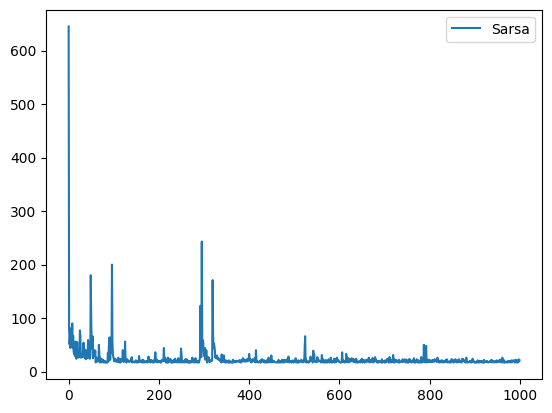

In [25]:
plt.plot(sarsa_history, label="Sarsa")
plt.legend()
plt.show()

In [26]:
sarsa_policy = np.argmax(windySarsa.Q,axis =2)
for i in range(height):
    for j in range(width):
        if [i, j] == start:
            print("S", end=" ")
        elif [i, j] == goal:
            print("G", end=" ")
        elif [i, j] in cliff:
            print("C", end=" ")
        else:
            print(actions[sarsa_policy[i, j]], end=" ")
    print()

→ → → → → → → → → → ↓ ↓ 
→ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → ↓ 
↑ ↑ ↑ ↑ → ← ↑ → → ↑ → ↓ 
S C C C C C C C C C C G 


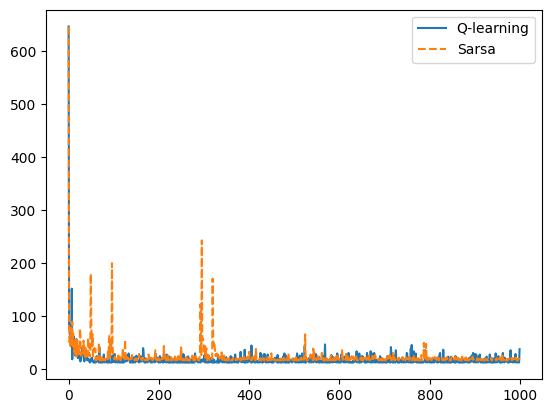

In [27]:
plt.plot(q_history, label="Q-learning")
plt.plot(sarsa_history, label="Sarsa", linestyle="--")
# plt.ylim(0, 100)
plt.legend()
plt.show()

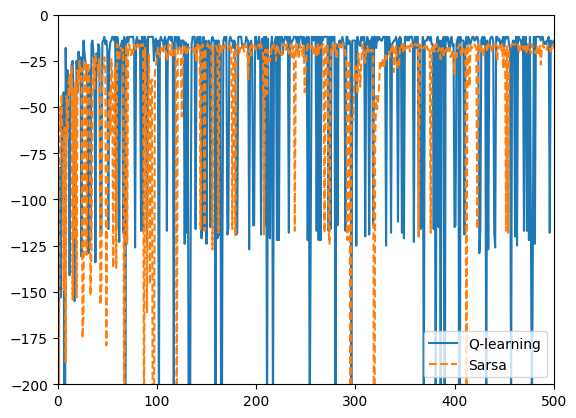

In [28]:
plt.plot(q_rewards, label="Q-learning")
plt.plot(sarsa_rewards, label="Sarsa", linestyle="--")
plt.ylim(-200,0)
plt.xlim(0,500)
plt.legend()
plt.show()

# expected Sarsa

Episode 0: Steps taken = 583, Total rewards = -1968
Policy:
↑ ↑ → ↑ ↑ → ↓ ↓ ↓ ↑ ← →
↓ → → ← → ← → → ← → → ↑
↑ → → ↑ ↑ ↑ ↑ ↑ ↑ → → ↓
← ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑

Episode 100: Steps taken = 24, Total rewards = -23
Policy:
↑ → → → ← → → → → → → ↓
→ → → → → → → → → → → ↓
← ← ↑ ↑ ↑ ↑ → ↑ ← → → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑

Episode 200: Steps taken = 15, Total rewards = -14
Policy:
← ↑ → → → → → → → → → ↓
→ → → → → → → → → → → ↓
↑ ↑ → ↑ ↑ ↑ ↑ ↑ ↑ ↑ → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑

Episode 300: Steps taken = 15, Total rewards = -14
Policy:
→ → → → → → → → → → → ↓
↑ → → → → → → → → → → ↓
↑ ↑ ↑ ↑ → ↑ ↑ ↑ → → → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑

Episode 400: Steps taken = 19, Total rewards = -18
Policy:
→ → → → → → → → → → → ↓
→ → → → → → → → → → → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑

Episode 500: Steps taken = 15, Total rewards = -14
Policy:
→ → → → → → → → → → → ↓
→ → → → → → → → → → → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ → → ↓
↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑ ↑

Episode 600: Steps taken = 19, Total rewards = -18
Policy:
→ → 

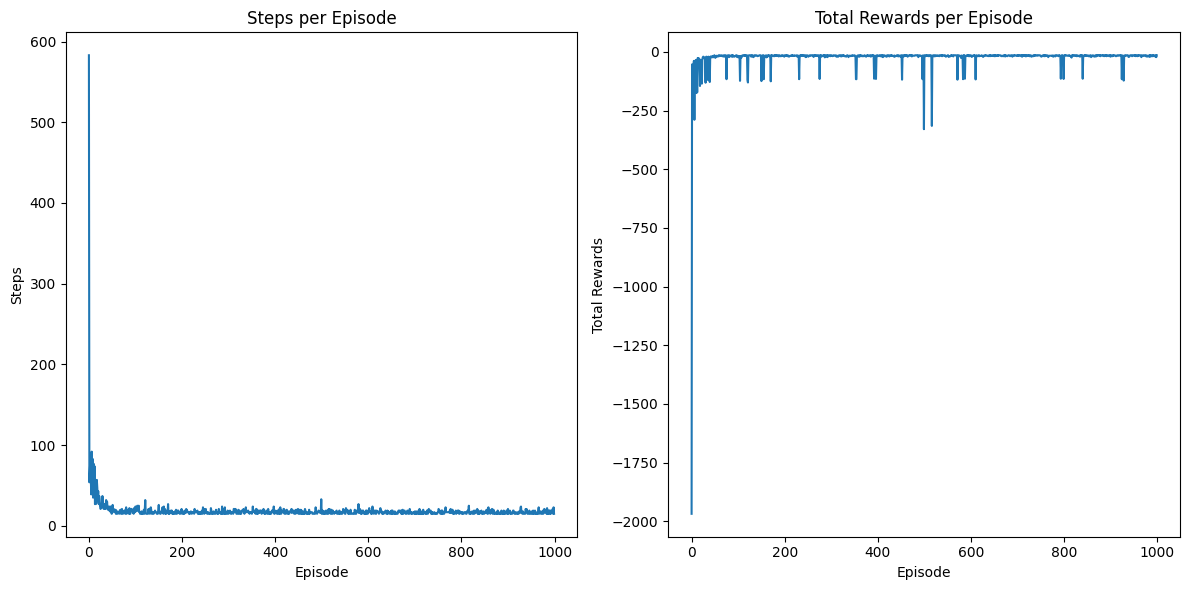

In [29]:
import numpy as np
import matplotlib.pyplot as plt

height = 4
width = 12
Q = np.zeros((height, width, 4))  # 状態ごとに4つの行動を保持
start = [height - 1, 0]
goal = [height - 1, width - 1]
cliff = [[height - 1, i] for i in range(1, width - 1)]
actions = ["↑", "←", "↓", "→"]  # up left down right

class ExpectedSarsa:
    
    def __init__(self, Q, start, goal, cliff):
        self.state = start  
        self.start = start
        self.goal = goal
        self.cliff = cliff
        self.Q = Q
        self.alpha = 0.5
        self.reward = -1
        self.gamma = 1
        self.epsilon = 0.1
        self.sum_rewards = 0  # 合計報酬を数値で管理

    def move(self, state, action):
        x, y = state
        if action == 0 and x > 0:  # 上
            x -= 1
        elif action == 1 and y > 0:  # 左
            y -= 1
        elif action == 2 and x < height - 1:  # 下
            x += 1
        elif action == 3 and y < width - 1:  # 右
            y += 1
        next_state = [x, y]
        return next_state

    def is_cliff(self, state):
        return state in self.cliff

    def is_goal(self, state):
        return state == self.goal

    def compute_expected_value(self, next_state):
        """次状態における期待値を計算"""
        x, y = next_state
        q_values = self.Q[x, y, :]
        max_action = np.argmax(q_values)

        # \epsilon-greedy ポリシーに基づく確率計算
        policy = np.ones(len(actions)) * (self.epsilon / len(actions))
        policy[max_action] += 1 - self.epsilon

        # 期待値を計算
        expected_value = np.sum(policy * q_values)
        return expected_value

    def update(self, Q, state, action, next_state):
        x, y = state
        x_, y_ = next_state

        # 次状態における期待値を計算
        expected_value = self.compute_expected_value(next_state)

        # Q値を更新
        Q[x, y, action] += self.alpha * (
            self.reward + self.gamma * expected_value - Q[x, y, action]
        )
        return Q

    def step(self):
        self.reward = -1  # 毎ステップの基本報酬をリセット
        if np.random.rand() < self.epsilon:
            action = np.random.randint(4)
        else:
            action = np.argmax(self.Q[self.state[0], self.state[1], :])

        next_state = self.move(self.state, action)

        if self.is_cliff(next_state):
            self.reward = -100
            next_state = self.start
        elif self.is_goal(next_state):
            self.reward = 0

        # 報酬を合計
        self.sum_rewards += self.reward

        self.Q = self.update(self.Q, self.state, action, next_state)
        self.state = next_state
        return self.state

def print_policy(Q):
    policy_grid = np.argmax(Q, axis=2)
    action_symbols = ["↑", "←", "↓", "→"]
    for row in policy_grid:
        print(" ".join(action_symbols[a] for a in row))
    print()

# メインループ
expectedSarsa = ExpectedSarsa(Q, start, goal, cliff)
expected_sarsa_history = []
expected_sarsa_rewards = []

for i in range(1000):
    expectedSarsa.state = expectedSarsa.start  # 各エピソードの初期化
    expectedSarsa.sum_rewards = 0  # 報酬の合計をリセット
    count = 0
    while not expectedSarsa.is_goal(expectedSarsa.state):
        count += 1 
        expectedSarsa.step()
    expected_sarsa_history.append(count)
    expected_sarsa_rewards.append(expectedSarsa.sum_rewards)  # エピソード全体の報酬を記録
    if i % 100 == 0:
        print(f"Episode {i}: Steps taken = {count}, Total rewards = {expectedSarsa.sum_rewards}")
        print("Policy:")
        print_policy(expectedSarsa.Q)

# 学習曲線をプロット
plt.figure(figsize=(12, 6))

# ステップ数の推移
plt.subplot(1, 2, 1)
plt.plot(expected_sarsa_history)
plt.title("Steps per Episode")
plt.xlabel("Episode")
plt.ylabel("Steps")

# 報酬の推移
plt.subplot(1, 2, 2)
plt.plot(expected_sarsa_rewards)
plt.title("Total Rewards per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Rewards")

plt.tight_layout()
plt.show()


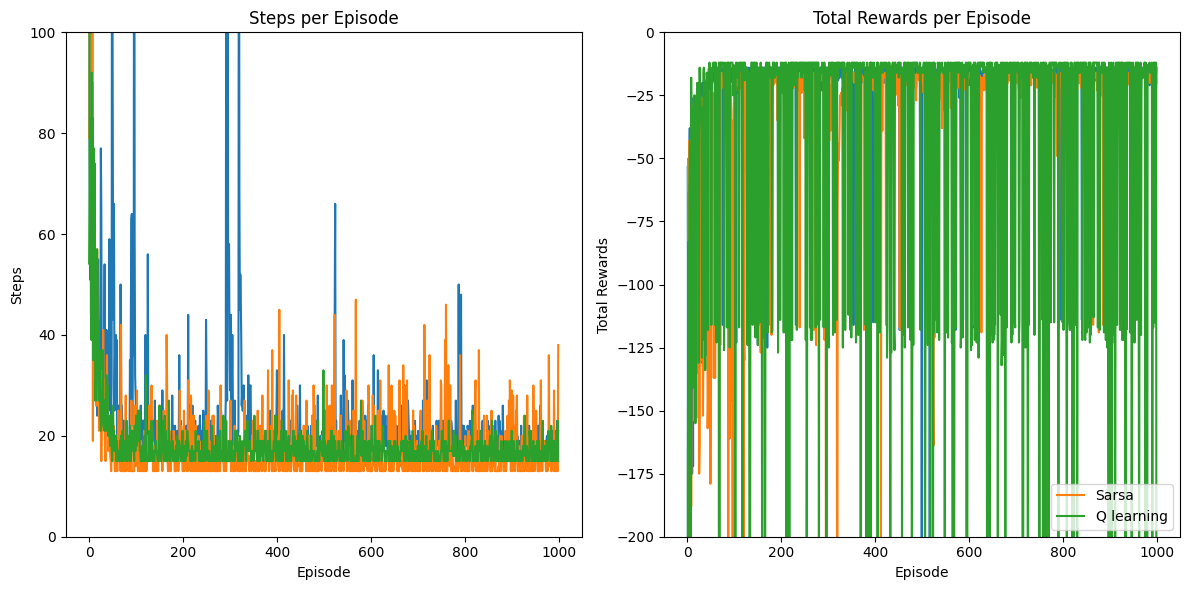

In [30]:
# 学習曲線をプロット
plt.figure(figsize=(12, 6))

# ステップ数の推移
plt.subplot(1, 2, 1)
plt.plot(sarsa_history, label="Sarsa")
plt.plot(q_history, label="Q-learning")
plt.plot(expected_sarsa_history)
plt.title("Steps per Episode")
plt.ylim(0, 100)    
plt.xlabel("Episode")
plt.ylabel("Steps")

# 報酬の推移
plt.subplot(1, 2, 2)
plt.plot(expected_sarsa_rewards)
plt.plot(sarsa_rewards, label="Sarsa")
plt.plot(q_rewards, label="Q learning")
plt.title("Total Rewards per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Rewards")
plt.ylim(-200, 0)

plt.tight_layout()
plt.legend()
plt.show()


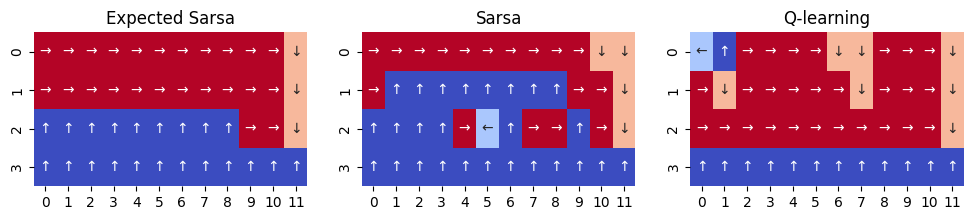

In [40]:
import seaborn as sns
actions = ["↑", "←", "↓", "→"]  # up, left, down, right

Q_policy = np.argmax(windyQ.Q, axis=2)  # 各状態での最適行動
Sarsa_policy = np.argmax(windySarsa.Q, axis=2)  # 各状態での最適行動
expectedSarsa_policy = np.argmax(expectedSarsa.Q, axis=2)  # 各状態での最適行動

Q_policy_labels = np.empty_like(Q_policy, dtype=str)
for i in range(height):
    for j in range(width):
        Q_policy_labels[i, j] = actions[Q_policy[i, j]]
Sarsa_policy_labels = np.empty_like(Sarsa_policy, dtype=str)
for i in range(height):
    for j in range(width):
        Sarsa_policy_labels[i, j] = actions[Sarsa_policy[i, j]]

expectedSarsa_policy_labels = np.empty_like(expectedSarsa_policy, dtype=str)
for i in range(height):
    for j in range(width):
        expectedSarsa_policy_labels[i, j] = actions[expectedSarsa_policy[i, j]] 

plt.figure(figsize=(12, 2))
plt.subplot(1, 3, 1)
sns.heatmap(np.argmax(expectedSarsa.Q, axis=2), annot=expectedSarsa_policy_labels, fmt="", cmap="coolwarm", cbar=False)
plt.title("Expected Sarsa")

plt.subplot(1, 3, 2)
sns.heatmap(np.argmax(windySarsa.Q, axis=2), annot=Sarsa_policy_labels, fmt="", cmap="coolwarm", cbar=False)
plt.title("Sarsa")


plt.subplot(1, 3, 3)
sns.heatmap(np.argmax(windyQ.Q, axis=2), annot=Q_policy_labels, fmt="", cmap="coolwarm", cbar=False)   
plt.title("Q-learning")
plt.show()  